###Importy

In [6]:
# tu budú zobrazené všetky importy knižnic, ktoré budeme v projekte používať
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

##1. Predpríprava dát
Ako prvý krok bude importnutie datasetu a jeho zobrazenie v pandas dataframe.

In [2]:
# pomocou knižnice pandas načítaj csv a vytvor z neho dataframe
dataset = pd.read_csv("/content/drive/MyDrive/Škola/NS/Laca_NS2021/dataset.csv")
# ukáž prvé riadky nového dataframu
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


Ďalším dôležitým krokom je rozdelenie dát do dvoch polí, kde v poli ***'X'*** budú vlastnosti telefónov a v poli ***'y'*** cenová kategória telefónov.

In [3]:
# vyber z dataframu hodnoty do 20 a ulož ich do pola 'X'
X = dataset.iloc[:,:20].values
# vyber z dataframu hodnoty od 20 a ulož ich do pola 'y' (iba prince_range teda)
y = dataset.iloc[:,20:].values

# zobraz vytvorené polia
print("Pole X: " + str(X))
print("\n")
print("Pole y: " + str(y))

Pole X: [[8.420e+02 0.000e+00 2.200e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [1.021e+03 1.000e+00 5.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 [5.630e+02 1.000e+00 5.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 ...
 [1.911e+03 0.000e+00 9.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 [1.512e+03 0.000e+00 9.000e-01 ... 1.000e+00 1.000e+00 1.000e+00]
 [5.100e+02 1.000e+00 2.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]]


Pole y: [[1]
 [2]
 [2]
 ...
 [3]
 [0]
 [3]]


##2. Normalizácia dát

Cieľom normalizácie je zmeniť hodnoty číselných stĺpcov v množine údajov na spoločnú škálu bez toho, aby došlo k narušeniu rozdielov v rozsahoch hodnôt. Nie je vždy nutné robiť normalizáciu. Vyžaduje sa, iba ak sa v datasete vyskytujú rôzne rozsahy. 

V tomto datasete je nutné spraviť normalizáciu pretože sa tu vyskytujú hodnoty ako `battery_power` čo sa pohybuje v tisíckach a hodnoty `clock_speed` ktoré sú aj ***0.6*** napríklad. 

Na jej implementáciu použijeme `StandardScaler` z kniźnice `sklearn.preprocessing`

In [4]:
# vytvoríme nový StandardScaler
standard_scaler = StandardScaler()
# aplikujeme metódu 'fit_transfrom' z novo vytvoreného StandardScaleru na pole 
# vlastností 'X', ktorá sa prispôsobí údajom a potom ich transformuje. 
X = standard_scaler.fit_transform(X)
# následne vypíšeme prvý riadok už z transformovaného pola
print(X[0])

[-0.90259726 -0.9900495   0.83077942 -1.01918398 -0.76249466 -1.04396559
 -1.38064353  0.34073951  1.34924881 -1.10197128 -1.3057501  -1.40894856
 -1.14678403  0.39170341 -0.78498329  0.2831028   1.46249332 -1.78686097
 -1.00601811  0.98609664]


### Použitie OneHotEncoderu

Dôležitým krokom je proces prevodu celočíselných tried na binárne hodnoty aby sme s nimi dokázali ďalej pracovať. Na uskutočnenie tohoto prevodu použijeme práve `OneHotEncoder` z knižnice  `sklearn.preprocessing`. Spôsob fungovania možno vidieť na nasledujúcom obrázku kde je zakódovaných prvých 5 riadkov datasetu: 

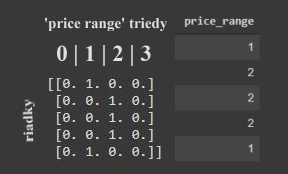

Teraz existuje pre `price_range` jedna jedinečná binárna hodnota. Nové vytvorené pole bude mať tvar ('**n**' * počet tried), kde n je počet riadkov v datasete.

In [5]:
# vytvoríme nový OneHotEncoder
one_hot_encoder = OneHotEncoder()
# aplikujeme metódu 'fit_transfrom' z novo vytvoreného OneHotEncoder na pole 
# tried 'y', ktorá sa prispôsobí údajom a potom ich transformuje do pola. 
y = one_hot_encoder.fit_transform(y).toarray()
# následne vypíšeme prvých 5. riadkov už z transformovaného pola
print(y[0:5])

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


### Rozdelenie dát na trénovacie a testovacie

Predtým než prejdeme k budovaniu neurónovej siete je dôležité si rozdeliť dateset na dáta ***trénovacie*** a dáta ***testovacie***, kde na trénovacich dátach budeme neurónovú sieť trénovať a na už testovanie natrénovanej neurónovej siete použijeme testovacie dáta.

Na rozdelenie dát použijeme funkciu `train_test_split` z knižnice `sklearn.model_selection`. Veľkosť trénovacich a testovacích dát určuje parameter `test_size`, kde napríklad hodnota ***0.2*** bude znamenať že budeme mať ***80%*** trénovacich dát a ***20%*** dát bude testovacích. 


In [22]:
# pomocou 'train_test_split' vytvoríme nasledovné premenné: 
# X_train kde budú uložené trénovacie dáta z pola 'X' (vlastnosti telefónov) v danom pomere test_size
# X_test kde budú uložené testovacie dáta z pola 'X' (vlastnosti telefónov) v danom pomere test_size
# y_train kde budú uložené trénovacie dáta z pola 'y' (cenové kategórie telefónov) v danom pomere test_size
# y_test kde budú uložené testovacie dáta z pola 'y' (cenové kategórie telefónov) v danom pomere test_size
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1)
# vypíšeme prvých 5 riadkov z každej premennej 
print("X - trénovacie dáta: \n" + str(X_train[0:5]) + "\n")
print("X - testovacie dáta: \n" + str(X_test[0:5]) + "\n")
print("y - trénovacie dáta: \n" + str(y_train[0:5]) + "\n")
print("y - testovacie dáta: \n" + str(y_test[0:5]) + "\n")

X - trénovacie dáta: 
[[ 1.48524725 -0.9900495   1.56625363 -1.01918398  0.61987971  0.95788598
   0.27305283 -0.35287781 -0.31785093  1.08404594  0.67353383 -1.07311326
  -0.33214155  1.45674879 -1.0223894   0.05349793 -0.0020137   0.55964063
  -1.00601811 -1.01409939]
 [-0.35400762  1.0100505   0.58562134 -1.01918398 -0.30170321 -1.04396559
   0.49354568  0.68754816  0.50157097  0.20963905 -0.81092912  0.65790362
  -0.20253933 -0.53594651  1.35167167 -0.63531667 -0.18507707 -1.78686097
  -1.00601811  0.98609664]
 [ 0.75910578 -0.9900495  -1.13048516 -1.01918398 -0.99289039  0.95788598
   1.43064028 -1.04649512  0.47331505  1.08404594 -0.31610814  1.04557927
   1.58643409  0.31147921 -0.07276497  0.51270767 -0.18507707  0.55964063
  -1.00601811 -1.01409939]
 [-1.64467286 -0.9900495  -0.51758998  0.98117712 -0.99289039  0.95788598
   0.38329926 -0.35287781 -1.39157619  0.20963905 -0.48104847  0.4730815
   0.34595575 -1.20355938 -1.0223894  -1.32413127 -0.18507707  0.55964063
   0.99401

##3. Neurónová sieť